In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
from fiona.crs import from_epsg
from PIL import Image

try:
    from urllib import urlretrieve as urlretrieve
except ImportError:
    from urllib.request import urlretrieve as urlretrieve
    
%matplotlib inline

In [2]:
def show_image(image):
    '''
    function to display a image within the environment
    
    parameters:
    image : path of the image to be displayed
    ''' 
    image = Image.open(image)
    f,ax = plt.subplots(figsize=(5, 5))
    plt.imshow(image)
    ax.set_axis_off()

# Download NYC Streets shapefile

In [3]:
urlretrieve("https://data.cityofnewyork.us/api/geospatial/exjm-f27b?method=export&format=Shapefile", "streets.gz")

('streets.gz', <http.client.HTTPMessage at 0x7f4b3c103898>)

In [4]:
!unzip streets.gz

Archive:  streets.gz
  inflating: geo_export_cff768a4-df34-4ac2-ab32-d238734e3999.dbf  
  inflating: geo_export_cff768a4-df34-4ac2-ab32-d238734e3999.shp  
  inflating: geo_export_cff768a4-df34-4ac2-ab32-d238734e3999.shx  
  inflating: geo_export_cff768a4-df34-4ac2-ab32-d238734e3999.prj  


In [3]:
streets_shp = gpd.read_file("geo_export_cff768a4-df34-4ac2-ab32-d238734e3999.shp")

# All streets in Manhattan only with ~ 25-50 percentile street width

In [4]:
streets_shp[(streets_shp["borocode"]=="1")].describe()

,frm_lvl_co,l_blkfc_id,physicalid,r_blkfc_id,rw_type,shape_leng,st_width,to_lvl_co
count,13314.000000,1.331400e+04,13314.000000,1.331400e+04,13314.000000,13314.000000,13314.000000,13314.000000
mean,13.410921,9.451316e+08,74768.677257,9.437554e+08,2.525837,346.199152,31.468830,13.421737
std,1.974883,5.508674e+08,65234.074439,5.511029e+08,3.035725,579.780872,18.883919,1.981340
min,4.000000,0.000000e+00,3.000000,0.000000e+00,1.000000,4.511256,0.000000,4.000000
25%,13.000000,2.122616e+08,3852.250000,2.122617e+08,1.000000,122.248113,22.000000,13.000000
50%,13.000000,1.222605e+09,77314.500000,1.222605e+09,1.000000,260.754923,30.000000,13.000000
75%,13.000000,1.322603e+09,133023.750000,1.322603e+09,3.000000,417.118477,42.000000,13.000000
max,26.000000,1.922616e+09,185059.000000,1.922616e+09,14.000000,26573.752668,120.000000,26.000000


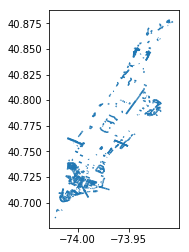

In [6]:
streets_shp[(streets_shp["borocode"]=="1")&(streets_shp["st_width"]>20)&(streets_shp["st_width"]<30)].plot()

In [7]:
mh_streets = streets_shp[(streets_shp["borocode"]=="1")&(streets_shp["st_width"]>20)&(streets_shp["st_width"]<30)]['geometry']

In [8]:
mh_streets.shape

(1707,)

# Define index to download a subset of images

In [9]:
index = range(10)

# Define your API key

In [24]:
api_key = "xxxx"

In [23]:
for street in mh_streets.get_values()[index]:
    for i in np.arange(0,len(street.xy[0]),5):
        x = street.xy[0][i]
        y = street.xy[1][i]
        point = shapely.geometry.Point(x,y)
        urlretrieve("https://maps.googleapis.com/maps/api/streetview?size=600x600&location="+str(point.y)+","+str(point.x)+"&fov=90&heading=90&pitch=10&key="+api_key, "Images/"+str(point.y)+"_"+str(point.x)+"_90.png")
        urlretrieve("https://maps.googleapis.com/maps/api/streetview?size=600x600&location="+str(point.y)+","+str(point.x)+"&fov=90&heading=180&pitch=10&key="+api_key, "Images/"+str(point.y)+"_"+str(point.x)+"_180.png")
        urlretrieve("https://maps.googleapis.com/maps/api/streetview?size=600x600&location="+str(point.y)+","+str(point.x)+"&fov=90&heading=270&pitch=10&key="+api_key, "Images/"+str(point.y)+"_"+str(point.x)+"_270.png")
        urlretrieve("https://maps.googleapis.com/maps/api/streetview?size=600x600&location="+str(point.y)+","+str(point.x)+"&fov=90&heading=360&pitch=10&key="+api_key, "Images/"+str(point.y)+"_"+str(point.x)+"_360.png")